In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logomaker as lm
import pandas as pd

## Specify inputs and load data

In [3]:
input_layer_weights = np.loadtxt("acc.ex3.rearranged.weights.hidden.csv")
x = 1 # specify node

In [6]:
input_layer_weights

array([-3.092872  ,  0.60876447,  2.2166622 ])

In [90]:
# Output layer -> node x between 1 and 9
node = []
for nt in input_layer_weights:
    node.append(nt[x-1])
node = np.array(node)

## Make logo

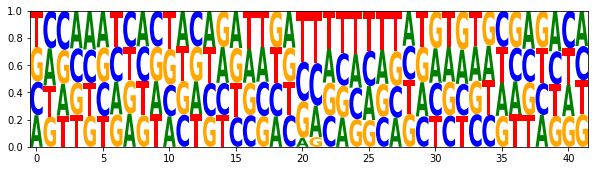

In [91]:
node = node.reshape(42, 4)
node_norm = []
for nt in node:
    norm_ntlst = []
    row_sum = sum([np.exp(j) for j in nt])
    for j in nt:
        norm_j = np.exp(j) / row_sum
        norm_ntlst.append(norm_j)
    node_norm.append(norm_ntlst)
df = pd.DataFrame(node_norm, columns=['A','C','G','T'])
logo = lm.Logo(df)

## Make logo (perceptron)

In [5]:
w = input_layer_weights.reshape(42, 4)
node_norm = []
for nt in w:
    norm_ntlst = []
    row_sum = sum([np.exp(j) for j in nt])
    for j in nt:
        norm_j = np.exp(j) / row_sum
        norm_ntlst.append(norm_j)
    node_norm.append(norm_ntlst)

ValueError: cannot reshape array of size 3 into shape (42,4)

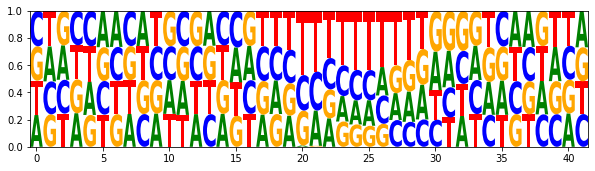

In [85]:
df = pd.DataFrame(node_norm, columns=['A','C','G','T'])
logo = lm.Logo(df)

## Find the sequence that maximizes probability of a 1

In [52]:
dct = {0:'A', 1:'C', 2:'G', 3:'T'}
seq = ""
for row in np.exp(node):
    idx = np.argmax(row) # find where the maximum of the row is
    seq += dct[idx]
seq

'AATAAAAAATTTTTTTTTTCCCGCCCCCCCCGCCGCCGCCCG'

## Stacked bar chart

In [21]:
node_norm = np.array(node_norm)

In [11]:
labels = [i for i in range(0,42)]
#pctA = node1[0,:]
#pctC = node1[1,:]
#pctG = node1[2,:]
#pctT = node1[3,:]
pctA = node_norm[:,0]
pctC = node_norm[:,1]
pctG = node_norm[:,2]
pctT = node_norm[:,3]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, pctA, width, label='A')
ax.bar(labels, pctC, width, label='C', bottom=pctA)
ax.bar(labels, pctG, width, label='G', bottom=pctA+pctG)
ax.bar(labels, pctT, width, label='T', bottom=pctA+pctG+pctT)

ax.set_ylabel('Proportion')
ax.set_title('Title')
ax.legend()

plt.show()

TypeError: list indices must be integers or slices, not tuple

## View raw output

In [7]:
# zoom in to center
node1[56:-56].shape

NameError: name 'node1' is not defined

In [ ]:
plt.bar(list(range(0,56)), node1[56:-56])

In [ ]:
node2 = []
for nt in input_layer_weights:
    node2.append(nt[1])
node2 = np.array(node2)
plt.bar(list(range(0,56)), node2[56:-56])

In [ ]:
node3 = []
for nt in input_layer_weights:
    node3.append(nt[2])
node3 = np.array(node3)
plt.bar(list(range(0,168)), node3)

In [ ]:
print(node1.shape)

In [ ]:
hi vs. fake
try it on the same genome